<center>
    <tr>
    <td><img src="ontario-tech-univ-logo.png" width="25%"></img></td>
    </tr>
</center>

# Traffic Stop Sign Detection

Faisal Qureshi   
Professor    
Faculty of Science    
Ontario Tech University    
Oshawa ON Canada    
http://vclab.science.ontariotechu.ca

## Copyright information

&copy; Faisal Qureshi

## License

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

## Focus

- Linear filtering
- Image gradients
- Template matching
- Image pyramids

## Preamble

You've been hired by Tesla to work on their new autonomous driving system.  Autonomous driving requires that you are able to understand traffic signs.  As a first step, you are tasked with developing a system that can detect traffic stop signs in images captured by onboard cameras.  Tesla is going through a difficult time, and unfortunately you do not have access to GPUs needed to train deep learning models.  You are a go getter, however, and you are not discouraged by the lack of GPUs.  You decided to use all that you learned in the first two weeks of your favourite undergraduate course to come up with a viable solution.  Specifically, you'll use all that you learned in linear filtering and image pyramids to design a system for detecting traffic stop signs in images. 

You can already see that the problem is one of "template matching," i.e., given a template of stop sign, you can use template matching techniques to detect whether or not a stop sign is seen in the image.  Check out template matching notes [http://csundergrad.science.uoit.ca/courses/cv-notes/notebooks/06-template-matching.html](http://csundergrad.science.uoit.ca/courses/cv-notes/notebooks/06-template-matching.html).

## Dataset

For this task you'll uses the Road Signs Dataset found at [https://www.kaggle.com/datasets/andrewmvd/road-sign-detection](https://www.kaggle.com/datasets/andrewmvd/road-sign-detection).  This dataset contains more than 800 images containing road signs of various ilk.  Accompanying XML files include metadata for each image file.  The metadata contains information about the location and type of road sign present in the image.  The following figure shows a sample image from this dataset.

<center>
    <img src='03a-traffic-stop-sign-detection/road62.png' width='20%'>
    <figcaption>Stop sign seen in image `road62.png`</figcaption>
</center>

The accompanying XML file `road62.xml` contains

```

<annotation>
    <folder>images</folder>
    <filename>road62.png</filename>
    <size>
        <width>267</width>
        <height>400</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>stop</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>126</xmin>
            <ymin>113</ymin>
            <xmax>215</xmax>
            <ymax>201</ymax>
        </bndbox>
    </object>
</annotation>
```

You can also download the dataset from [https://drive.google.com/drive/folders/1MAv77UPChcZneJr4ik4X3i8s9AYFC2-B?usp=sharing](https://drive.google.com/drive/folders/1MAv77UPChcZneJr4ik4X3i8s9AYFC2-B?usp=sharing) using your Ontario Tech credentials.

## Tasks

You are asked to complete the following tasks.

Notes: 

- You'll have to process the accompanying XML file to complete the following tasks.
- These tasks ask you to develop code that you can run via *commandline*.  You are, however, welcome to structure your code in a manner that you are able to test/evaluate it within a jupyter environment.  Ideally, the core pieces of code should be useable both within the jupyter environment and commandline.

#### Displaying images

`python stopsign.py --show-image <image.png>`    

Displays the image and shows the name and location of the traffic sign seen in this image.  

#### Stop Sign Detection

`python stopsign.py --detectall <folder-containing-png>`   

Processes all png files in the folder and prints out the following information    


| filename | stop sign detected | ground truth |
| --- | --- | --- |
| road62.png | Yes | Yes |

Additionally, computes *false positives* and *false negatives* and prints out the following summary

- Total images processed
- False positives (system detected a stop sign when there was no stop sign in the image)
- False negatives (system did not detect a stop sign when there was a stop sign in the image)
- Total time taken (in milliseconds)

#### Stop Sign Detection with Display

`python stopsign.py --detect <image.png>`

Displays the image and shows the name and location of the traffic sign seen in this image.  Additionally, shows (in the top left corner) whether or not a stop sign is detected by your system.

## Recipe

### Ingredient

- You'll need to construct a template for stop sign.  The template can use any information that is available to you in an RGB image, e.g., color channels, grayscale information, gradient information, etc.

### Steps

Given an image I and a template T

- Pick your favorite template matching algorithm, and perform matching between I and T
- Identify the location where you get the strongest response

In order to achieve scale invariance

- Construct an image pyramid of I
- Perform matching between T and every level of the image pyramid that you've just constructed
- Identify the level (and the location) where you get the strongest response

## Example code 

Use the code below to get things moving.

In [34]:
import cv2 as cv
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

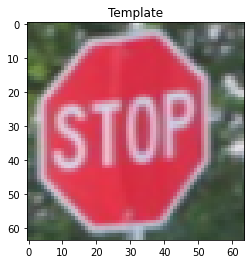

In [35]:
T = cv.imread('data/traffic-stop-signs/template-1-1.png')
T = cv.cvtColor(T, cv.COLOR_BGR2RGB)
T = cv.resize(T, (64,64))

plt.title('Template')
plt.imshow(T, cmap='gray');

(726, 1024, 3)


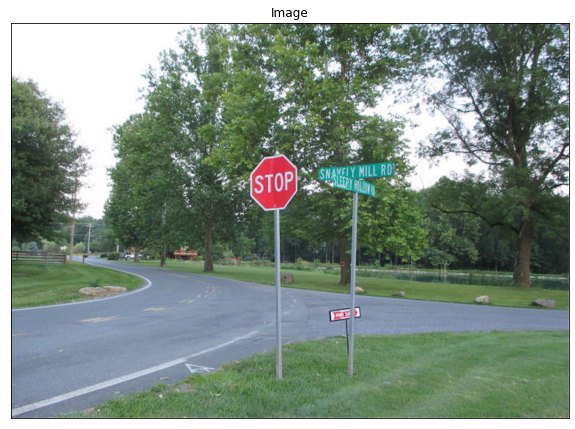

In [25]:
I = cv.imread('data/traffic-stop-signs/traffic-stop-1.jpg')
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)
print(I.shape)

plt.figure(figsize=(10,10))
plt.title('Image')
plt.imshow(I, cmap='gray')
plt.xticks([])
plt.yticks([]);

### Dummy routine

In [26]:
# Your solution goes here
def find_stop_sign(T, I):
    """
    Given a traffic stop sign template T and an image I, returns the bounding box 
    for the detected stop sign.
    
    A bounding box is defined as follows: [top, left, height, width]
    
    You may return an empty bounding box [0,0,1,1] to indicate that a 
    stop sign wasn't found.
    """
    
    # The following hardcoded value uses:
    #
    # T = 'data/traffic-stop-signs/template-1-1.png'
    # I = 'data/traffic-stop-signs/traffic-stop-1.jpg
    #
    # You need to implement this method to work with other templates 
    # and images
       
    return np.array([434, 240, 110, 110]).astype(int)

### Use the following code to visualize template matching results

In [27]:
def highlight(R, T, I, use_max=True):
    """
    Finds the location of maximum (or minimum) matching response, and 
    draws a rectangle on the image around this location.  The
    size of the rectangle is determined by template T.
    
    Returns an image with the drawn rectangle.  Also returns the loc and
    the value (maximum or minimum as the case may be).  The original image
    remains unchanged.
    """
    
    W, H = I.shape[0], I.shape[1]
    w, h = T.shape[0], T.shape[1]
    wr, hg = R.shape[0], R.shape[1]
        
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(R)
    loc = max_loc if use_max else min_loc
    val = max_val if use_max else min_val
    
    loc1 = loc + np.array([h//2, w//2])               # Size of R is different from I 
    tl = loc1 - np.array([h//2, w//2])
    br = loc1 + np.array([h//2, w//2])
    I_ = np.copy(I)
    c = (1.0, 0, 0) if I_.dtype == 'float32' else (255, 0, 0)
    cv.rectangle(I_, tuple(tl), tuple(br), c, 4)
    return I_, loc, val

### The following method can be used to find min/max location in response matrix

In [28]:
def find_loc_and_value_in_R(R, use_max=True):
    """
    Finds the location of maximum (or minimum) matching response.
    """
    
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(R)
    loc = max_loc if use_max else min_loc
    val = max_val if use_max else min_val
    
    return loc, val

### The following code can be used draw a rect (of the size of the template) around a location in the image.

In [29]:
def draw_rect(I, bbox):

    I_ = np.copy(I)
    c = (1.0, 0, 0) if I_.dtype == 'float32' else (255, 0, 0)
    cv.rectangle(I_, bbox, c, 4)
    return I_

### Code for constructing Gaussian pyramid

In [30]:
def gen_gaussian_pyramid(I, levels):
    G = I.copy()
    gpI = [G]
    for i in range(levels):
        G = cv.pyrDown(G)
        gpI.append(G)
    return gpI

### Code for visualizing Gaussian pyramids

This code can be used to visualize Gaussian pyramid as a single image.  

*You can use it to also visualize Laplacian pyramid; however, don't forget to reverse the input list.*

In [31]:
def visualize_guassian_pyramid(gpI):
    I = gpI[0]
    h, w = I.shape[0], I.shape[1]
    
    if len(I.shape) == 3:
        result = np.empty([h, 2*w, I.shape[2]], dtype=I.dtype)
    else:
        result = np.empty([h, 2*w], dtype=I.dtype)
    
    x = 0
    for I_ in gpI:
        if len(I.shape) == 3:
            h, w, _ = I_.shape
            result[:h,x:x+w,:] = I_
        else:
            h, w = I_.shape
            result[:h,x:x+w] = I_
        x += w
    
    return result

### Code for making square images (to help with Gaussian pyramid generation)

In [32]:
def make_square(I):
    h = I.shape[0]
    w = I.shape[1]
    
    n_levels = np.int(np.ceil(np.log(np.max([h,w]))/np.log(2)))
    new_h = np.power(2, n_levels)
    new_w = new_h
    
    if len(I.shape) == 3:
        tmp = np.zeros([new_h, new_w, I.shape[2]], dtype=I.dtype)
        tmp[:h,:w,:] = I
    else:
        tmp = np.zeros([new_h, new_w], dtype=I.dtype)
        tmp[:h,:w] = I

    return tmp, n_levels

### Usage

Bbox = [434 240 110 110]


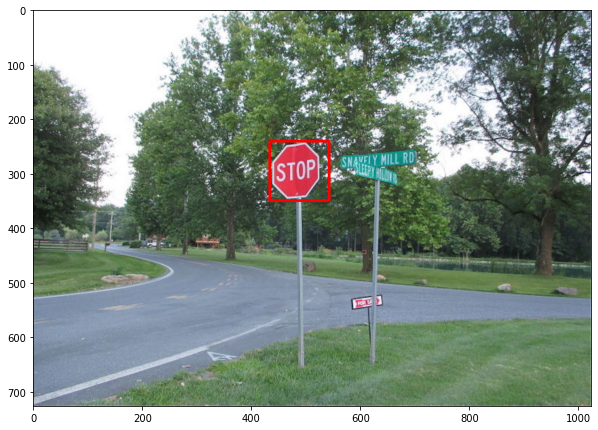

In [33]:
bbox = find_stop_sign(T, I)
print(f'Bbox = {bbox}')

plt.figure(figsize=(10,10))
I_ = draw_rect(I, bbox)
plt.imshow(I_, cmap='gray');

## Marking considerations

Since this lab doesn't have a clean cut solution, the marks will reflect how well you have applied all the topics that we have covered thus far---linear filtering, image pyramids, template matching, etc.---to solve the problem of traffic stop sign detection.

## Submission

Include code and results. *Submit via canvas.*

<center>
    <tr>
    <td><img src="ontario-tech-univ-logo.png" width="25%"></img></td>
    </tr>
</center>